In [15]:
#importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [16]:
#defining the start and end
start = '2011-01-01'
end = '2021-12-31'

#scrapping data from yahoo finance website
df = data.DataReader('AAPl', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.091493
2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.144160
2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.227142
2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.218872
2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.292054


In [17]:
#reset index
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2011-01-03,11.795000,11.601429,11.630000,11.770357,445138400.0,10.091493
1,2011-01-04,11.875000,11.719643,11.872857,11.831786,309080800.0,10.144160
2,2011-01-05,11.940714,11.767857,11.769643,11.928571,255519600.0,10.227142
3,2011-01-06,11.973214,11.889286,11.954286,11.918929,300428800.0,10.218872
4,2011-01-07,12.012500,11.853571,11.928214,12.004286,311931200.0,10.292054


In [18]:
#remove columns we don't need
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,High,Low,Open,Close,Volume
0,11.795000,11.601429,11.630000,11.770357,445138400.0
1,11.875000,11.719643,11.872857,11.831786,309080800.0
2,11.940714,11.767857,11.769643,11.928571,255519600.0
3,11.973214,11.889286,11.954286,11.918929,300428800.0
4,12.012500,11.853571,11.928214,12.004286,311931200.0


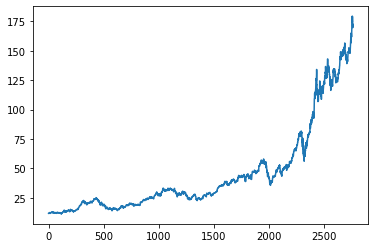

In [19]:
plt.plot(df.Close)

In [20]:
#takes 100 day clsing avg
ma100 = df.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2757    151.39130
2758    151.64620
2759    151.90780
2760    152.14890
2761    152.41625
Name: Close, Length: 2762, dtype: float64

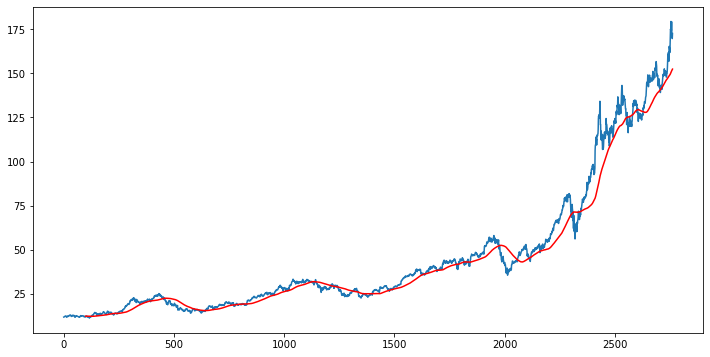

In [21]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [22]:
#takes 200 day closing avg
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2757    140.973600
2758    141.234250
2759    141.482850
2760    141.749800
2761    142.007325
Name: Close, Length: 2762, dtype: float64

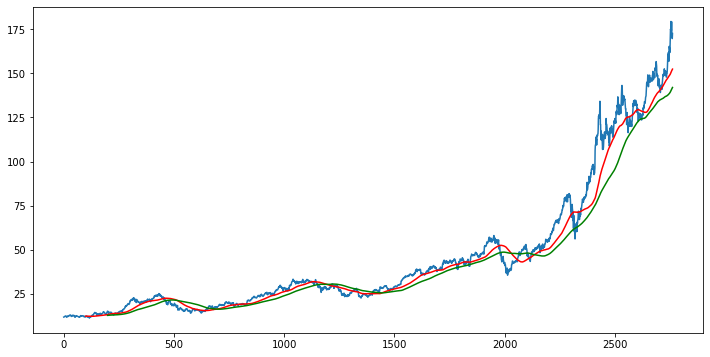

In [23]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [24]:
df.shape

(2762, 5)

In [25]:
#Now we begin to split data into Training and Testing for data predections
#so that 70% of data is in the training and 30% is in testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_testing.shape)
print(data_training.shape)

(829, 1)
(1933, 1)


In [26]:
#scale data 
#all values can be scaled down between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [27]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01110504],
       [0.01244545],
       [0.01455734],
       ...,
       [1.        ],
       [0.99187185],
       [0.97130614]])

In [28]:
#first 100 days will become x train use to predict
#next 100 days will become y train prediction
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i]) #start at 0
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [29]:
#ML Model

In [30]:
from tensorflow import keras
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [31]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True, 
               input_shape =(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
58/58 [==============================] - 17s 206ms/step - loss: 0.0280
Epoch 2/50
58/58 [==============================] - 11s 182ms/step - loss: 0.0079 E
Epoch 3/50
58/58 [==============================] - 11s 183ms/step - loss: 0.0055
Epoch 4/50
58/58 [==============================] - 11s 189ms/step - loss: 0.0055
Epoch 5/50
58/58 [==============================] - 12s 202ms/step - loss: 0.0046
Epoch 6/50
58/58 [==============================] - 12s 211ms/step - loss: 0.0043
Epoch 7/50
58/58 [==============================] - 12s 202ms/step - loss: 0.00472s - l
Epoch 8/50
58/58 [==============================] - 12s 203ms/step - loss: 0.0042
Epoch 9/50
58/58 [==============================] - 12s 214ms/step - loss: 0.0039
Epoch 10/50
58/58 [==============================] - 13s 228ms/step - loss: 0.0035
Epoch 11/50
58/58 [==============================] - 13s 232ms/step - loss: 0.0039
Epoch 12/50
58/58 [==============================] - 15s 255ms/step - loss: 0.0039
Epoch

In [34]:
model.save('keras_model.h5')

In [35]:
data_testing.head()

,Close
1933,55.325001
1934,54.582500
1935,55.962502
1936,55.267502
1937,56.602501


In [36]:
#to predict values for testing data we need the previous 100 days 
#this is found in data_training.tail(100)
past_100_days = data_training.tail(100)

In [37]:
final_df = past_100_days.append(data_testing, ignore_index = True)

In [39]:
#we must scale down these values between 0 and 1
input_data = scaler.fit_transform(final_df)
input_data

array([[0.06262922],
       [0.06193429],
       [0.05317837],
       [0.04087837],
       [0.04004448],
       [0.03604871],
       [0.03728217],
       [0.03827244],
       [0.0349716 ],
       [0.04007921],
       [0.04675041],
       [0.05972795],
       [0.06028387],
       [0.07234065],
       [0.07465124],
       [0.07619743],
       [0.07847327],
       [0.08312919],
       [0.08061013],
       [0.07984572],
       [0.07687497],
       [0.07989783],
       [0.07783048],
       [0.07664911],
       [0.07894235],
       [0.07812582],
       [0.08021056],
       [0.07984572],
       [0.08059276],
       [0.07941139],
       [0.07871649],
       [0.07762199],
       [0.08347667],
       [0.08623895],
       [0.08881013],
       [0.08997411],
       [0.08907073],
       [0.08601309],
       [0.08519656],
       [0.08702072],
       [0.0842758 ],
       [0.08444954],
       [0.08104445],
       [0.08087074],
       [0.075572  ],
       [0.0769792 ],
       [0.07517244],
       [0.074

In [41]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

In [42]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(829, 100, 1)
(829,)


In [43]:
#Making predictions
y_predicted = model.predict(x_test)

In [44]:
y_predicted.shape

(829, 1)

In [47]:
#now we must scale them back up
scaler.scale_

array([0.00694915])

In [48]:
scale_factor = 1/0.00694915
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

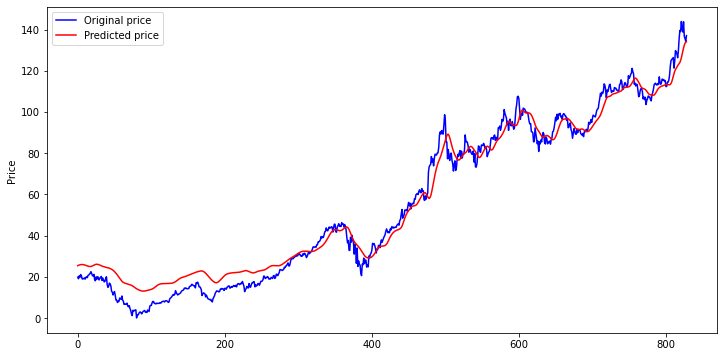

In [49]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original price')
plt.plot(y_predicted, 'r', label = 'Predicted price')
plt.xlabel = ('Time')
plt.ylabel('Price')
plt.legend()
plt.show